In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df['zip'].value_counts().head(5)

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

In [6]:
df['twp'].value_counts().head()

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

In [7]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [8]:
df.tail(50)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
423859,40.272369,-75.442693,SCHWENKSVILLE RD & SPRING MOUNT RD; UPPER SALF...,19473.0,Traffic: DISABLED VEHICLE -,2018-11-16 07:40:52,UPPER SALFORD,SCHWENKSVILLE RD & SPRING MOUNT RD,1,Traffic
423860,40.153760,-75.223839,BUTLER AVE & S MAIN ST; AMBLER; Station 351; ...,19002.0,EMS: UNCONSCIOUS SUBJECT,2018-11-16 07:42:09,AMBLER,BUTLER AVE & S MAIN ST,1,EMS
423861,40.023949,-75.323397,LANCASTER AVE & THOMAS AVE; LOWER MERION; 2018...,19010.0,Fire: APPLIANCE FIRE,2018-11-16 07:42:43,LOWER MERION,LANCASTER AVE & THOMAS AVE,1,Fire
423862,40.128634,-75.299349,GERMANTOWN PIKE & VIRGINIA RD; PLYMOUTH; Stat...,19462.0,EMS: UNCONSCIOUS SUBJECT,2018-11-16 07:46:09,PLYMOUTH,GERMANTOWN PIKE & VIRGINIA RD,1,EMS
423863,40.071248,-75.304613,WASHINGTON ST & ASH ST; CONSHOHOCKEN; 2018-11-...,19428.0,Fire: S/B AT HELICOPTER LANDING,2018-11-16 07:52:11,CONSHOHOCKEN,WASHINGTON ST & ASH ST,1,Fire
423864,40.267753,-75.603817,KEIM ST & RINGING ROCKS PARK; LOWER POTTSGROVE...,19464.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 07:58:40,LOWER POTTSGROVE,KEIM ST & RINGING ROCKS PARK,1,Traffic
423865,40.380820,-75.577332,NIANTIC RD & MILLER RD; DOUGLASS; Station 7A5...,19504.0,EMS: FALL VICTIM,2018-11-16 08:01:18,DOUGLASS,NIANTIC RD & MILLER RD,1,EMS
423866,40.143183,-75.119150,PARK AVE & MORELAND RD; UPPER MORELAND; 2018-1...,19090.0,Fire: FIRE INVESTIGATION,2018-11-16 08:02:05,UPPER MORELAND,PARK AVE & MORELAND RD,1,Fire
423867,40.229906,-75.484790,RT422 EB & RAMP RT422 EB TO TOWNSHIP LINE RD; ...,NaN,Traffic: DISABLED VEHICLE -,2018-11-16 08:01:18,LIMERICK,RT422 EB & RAMP RT422 EB TO TOWNSHIP LINE RD,1,Traffic
423868,40.229906,-75.484790,RT422 EB & RAMP RT422 EB TO TOWNSHIP LINE RD; ...,NaN,Traffic: DISABLED VEHICLE -,2018-11-16 08:04:17,LIMERICK,RT422 EB & RAMP RT422 EB TO TOWNSHIP LINE RD,1,Traffic


In [9]:
df['Reason'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: Reason, dtype: int64

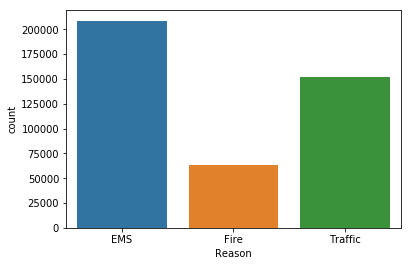

In [10]:
sns.countplot(df['Reason'])

In [11]:
type(df['timeStamp'][0]) 

str

In [12]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [16]:
time = df['timeStamp'].iloc[0]

print('Hour:',time.hour)
print('Month:',time.month)

Hour: 17
Month: 12


In [17]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)


In [18]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12


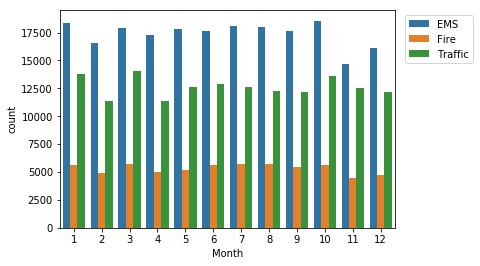

In [19]:
sns.countplot(df['Month'], hue=df['Reason'])
plt.legend(bbox_to_anchor=(1.25,1))

In [23]:
byMonth= pd.groupby(df,by='Month').count()

C:\Users\Naval\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Number of Calls')

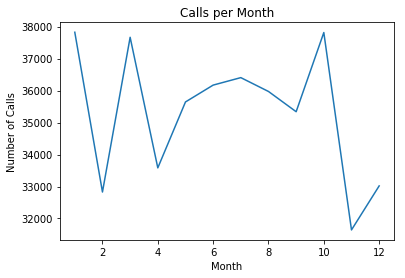

In [24]:
byMonth['e'].plot.line(y='e')
plt.title('Calls per Month')
plt.ylabel('Number of Calls')

In [25]:
byMonth.reset_index(inplace=True)

C:\Users\Naval\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(-8.7,0.5,'Number of Calls')

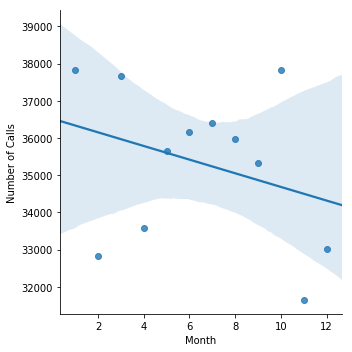

In [27]:
sns.lmplot(x='Month',y='e',data=byMonth)
plt.ylabel('Number of Calls')

In [28]:
df['Date']=df['timeStamp'].apply(lambda x: x.date())

In [29]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,2015-12-10


C:\Users\Naval\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  """Entry point for launching an IPython kernel.


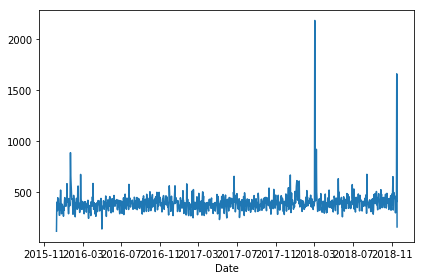

In [40]:
pd.groupby(df,'Date').count()['e'].plot.line(y='e')

plt.legend().remove()
plt.tight_layout()

C:\Users\Naval\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  """Entry point for launching an IPython kernel.


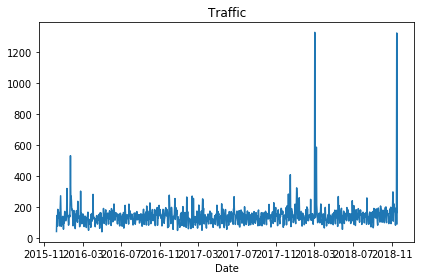

In [35]:
pd.groupby(df[df['Reason']=='Traffic'],'Date').count().plot.line(y='e')
plt.title('Traffic')
plt.legend().remove()
plt.tight_layout()

C:\Users\Naval\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  """Entry point for launching an IPython kernel.


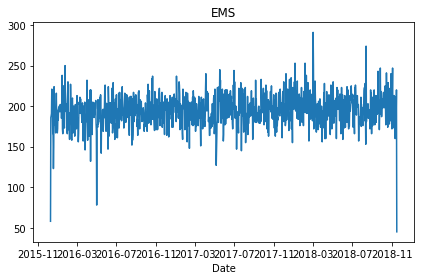

In [36]:
pd.groupby(df[df['Reason']=='EMS'],'Date').count().plot.line(y='e')
plt.title('EMS')
plt.legend().remove()
plt.tight_layout()


C:\Users\Naval\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  """Entry point for launching an IPython kernel.


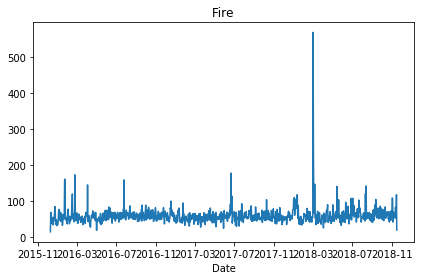

In [37]:
pd.groupby(df[df['Reason']=='Fire'],'Date').count().plot.line(y='e')
plt.title('Fire')
plt.legend().remove()
plt.tight_layout()